### Overview
Start-ups, often in their early stages of development, face numerous uncertainties and risks due to limited resources. To overcome these challenges, they require substantial funding and support. Investors play a crucial role by providing capital to help start-ups think big, achieve growth, and make a lasting impact. However, simply securing funding does not guarantee success, raising the question of what it takes for a start-up to truly flourish. While ideas, creativity, and execution are commonly emphasized as crucial elements, it begs the question: Are these factors alone sufficient for a start-up's success? This project aims to delve into the Indian start-up ecosystem, analyzing funding data from 2018 to 2021, to gain insights into the interplay between funding, ideas, creativity, execution, and overall start-up success. By examining the data, we can uncover valuable findings that will guide us in identifying the best course of action for venturing into the Indian start-up landscape.

## Introduction
India's start-up ecosystem has witnessed remarkable growth and innovation in recent years, attracting skilled entrepreneurs and government support. However, not all start-ups in this ecosystem thrive. To understand the key factors that contribute to start-up success, it is essential to analyze the funding landscape and investor involvement.This project focuses on analyzing the funding received by start-ups in India from 2018 to 2021. By examining start-up details, funding amounts, and investor information, it will provide insights that will guide our team's course of action in the Indian start-up ecosystem.

The mode of inquiry adapted for this project involved posing questions, examining the dataset for each year, and performing exploratory data analysis(EDA) to identify the trends and patterns in the funding data. By understanding the dynamics of funding and investor engagement, we can make informed decisions and optimize our approach for maximum impact and growth.This analysis will provide valuable insights into the Indian start-up ecosystem, equipping our team with the knowledge to navigate the challenges and capitalize on opportunities.

### Columns Description
Company/Brand: Name of the company/start-up

Founded: Year start-up was founded

Sector: Sector of service

What it does: Description about Company

Founders: Founders of the Company

Investor: Investors

Amount($): Raised fund

Stage: Round of funding reached


## Questions

1. What the trend of funding over the years?
2. Which sectors received the most funding?
3. Who are the top 10 investors In the Indian Ecosystem?
4. What are the top Companies in which start-up in India operate, and how much funding have they received?
5. What the entry trend of new companies in the startup ecosystem over the years?

## Hypothesis 1
 Ho:
The amount of funding received by start-ups in India has increased over the years
 
 
 H1:
 The amount of funding received by start-ups in India has not increased over the years
 
## Hypothesis 2
Ho:
Receiving more funds in India, as a start_up depends on the Location

H:
Funding does not depend on the Location
 

## Importation

In [1]:
#Importing the necessary libraries
import summarytools
import pandas as pd
import numpy as np
from summarytools import dfSummary

import seaborn as sns
import matplotlib.pyplot as plt

import re
from decimal import Decimal

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
#Read the data
data_2018 =pd.read_csv(r"C:\Users\Newton\Projects\Indian Start_Ups Funding\Data\startup_funding2018.csv")
data_2019 =pd.read_csv(r"C:\Users\Newton\Projects\Indian Start_Ups Funding\Data\startup_funding2019.csv")
data_2020 = pd.read_csv(r"C:\Users\Newton\Projects\Indian Start_Ups Funding\Data\startup_funding2020.csv")
data_2021 = pd.read_csv(r"C:\Users\Newton\Projects\Indian Start_Ups Funding\Data\startup_funding2021.csv")

### Deep Dive on the 2018 Dataset

In [3]:
data_2018.head(10)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...


In [4]:
print(data_2018.columns)
print(data_2019.columns)
print(data_2020.columns)
print(data_2021.columns)

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')
Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')
Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Unnamed: 9'],
      dtype='object')
Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')


There are incosistencies in the column names. The naming of the columns in the 2018 dataset is not the same as the other years. However, the details in some of the columns seem to be similar, despite the column naming.

In [5]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


The 2018 dataset has a total of 526 rows, and 6 columns. No missing values indicated, and all the columns are in string format

In [6]:
data_2018.shape

(526, 6)

In [7]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


The 2018 dataset has 526 rows, and 6 columns. The entries have no missing values, and all the columns have object data type. This includes event the amount column which should be in numeric.

In [8]:
#To show a summary of the numerical attributes os the 2018 dataset
data_2018.describe()

,Company Name,Industry,Round/Series,Amount,Location,About Company
count,526,526,526,526,526,526
unique,525,405,21,198,50,524
top,TheCollegeFever,—,Seed,—,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
freq,2,30,280,148,102,2


In [9]:
#Check for missing values
data_2018.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

The 2018 dataset seems to be having no missing values.

In [10]:
#Check for duplicates
data_2018.duplicated().sum()

1

In [11]:
#Taking a look at the duplicated row
pd.set_option('display.max_rows',None)
data_2018[data_2018.duplicated()]


,Company Name,Industry,Round/Series,Amount,Location,About Company
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [12]:
data_2018[data_2018["Company Name"]=="TheCollegeFever"]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


### Univariate Analysis

In [13]:
dfSummary(data_2018, is_collapsible = False)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Company Name[object],1. TheCollegeFever2. NIRAMAI Health Analytix3. Drivezy4. Hush - Speak Up. Make Work Bet5. The Souled Store6. Perspectico7. Kogta Financial India Limited8. Hospals9. UrbanClap10. Square Off11. other,2 (0.4%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)1 (0.2%)515 (97.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAACIUlEQVR4nO3aoW3DUBhG0Wer0DQKKG/n6QSeLRN0n/KAGpu7qDwysa50zgRPutIP/Hk6jmPQNF/9AM4TL0y8MPHCxAsTL0y8sHmaps+rH8E58xjj4+pHcI6zGSZemHhh4oWJFyZemHhh4oWJFyZe2DzG+Ln6EZwz+QGpy9kMMwmFmYTCnM0w8cLECxMvTLww8cLECxMvTLww8cJMQmEmoTBnM8wkFGYSCnM2w8QLEy9MvDDxwsQLEy9MvDDxwsQLMwmFmYTCnM0wk1CYSSjM2QwTL0y8MPHCxAsTL0y8MPHCxAsTL8wkFGYSCnM2w0xCYSahMGczTLww8cLECxMvTLww8cLECxMvTLwwk1CYSSjM2QwzCYWZhMKczTDxwsQLEy9MvDDxwsQLEy9MvDDxwkxCYSahMGczzCQUZhIKczbDxAsTL0y8MPHCxAsTL0y8MPHCxAszCYWZhMKczTCTUJhJKMzZDBMvTLww8cLECxMvTLww8cLECxMvTLwwe16YPS/M2Qyz54XZ88KczTDxwsQLEy9MvDDxwsQLEy9MvDDxwkxCYSahMGczzCQUZhIKczbDxAsTL0y8MPHCxAsTL0y8MPHCxAszCYWZhMKczbDpdrt9Lctyv/ohvG7f999t277flmW5r+v6vPpBvO7xeLyP4WymiRcmXph4YeKFiRcmXph4YeKFiRfm22bQ/7dNk1CYsxkmXph4YeKFiRcmXtgfhqxFEDsGQrkAAAAASUVORK5CYII="">",0(0.0%)
2,Industry[object],"1. —2. Financial Services3. Education4. Information Technology5. Health Care, Hospital6. Finance, Financial Services7. Fitness, Health Care, Wellness8. Internet9. Artificial Intelligence10. Health Care11. other",30 (5.7%)15 (2.9%)8 (1.5%)7 (1.3%)5 (1.0%)5 (1.0%)4 (0.8%)4 (0.8%)4 (0.8%)4 (0.8%)440 (83.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAACT0lEQVR4nO3aMWrjYBhFUSm4VPvjwqvyCrQ2rWBWlcKu1TvVDCRMYYKJcuGc1mAEF75CT/Pj8Zhoejv6Afg+8cLECxMvTLww8cLEC5vHGNdlWc5ff9j3/Xa/3/8c8VA857Qsy3ld1/evP2zbdjnigXiesxkmXph4YeKFiRcmXph4YeKFiRcmXph3m2GzD5C6nM2wT2fTqWz5NAmZgVqczTDxwsQLEy9MvDDxwsQLEy9MvDDxwrzbDDMJhTmbYf/OppPZ8/Z3EvrfpxD8bs5mmHhh4oWJFyZemHhh4oWJFyZemHhh3m2GmYTCnM2weYxxnaZpcjJ7TqagLmczTLww8cLECxMvTLww8cLECxMvTLyw077vt6Mfgu8xCYU5m2EmoTCTUJizGSZemHhh4oWJFyZemHhh4oWJFyZemEkozCQU5myGmYTCTEJhzmaYeGHihYkXJl6YeGHihYkXJl6YeGEmoTCTUJizGWYSCjMJhTmbYeKFiRcmXph4YeKFiRcmXph4YeKFmYTCTEJhzmaYSSjMJBTmbIaJFyZemHhh4oWJFyZemHhh4oWJFyZemD0vzJ4X5myG2fPC7HlhzmaYeGHihYkXJl6YeGHihYkXJl6YeGEmoTCTUJizGWYSCjMJhTmbYeKFiRcmXph4YeKFiRcmXph4YeKFmYTCTEJhzmbYPMa4WhZ+1r7vt1dMcKdlWc7rur6/4qF4zrZtl1f8j7MZJl6YeGHihYkXJl6YeGHihYkXJl6Yd5sHeNW7TZNQmLMZJl6YeGHihYkXJl7YB1OlrEafm00tAAAAAElFTkSuQmCC"">",0(0.0%)
3,Round/Series[object],1. Seed2. Series A3. Angel4. Venture - Series Unknown5. Series B6. Series C7. Debt Financing8. Private Equity9. Corporate Round10. Pre-Seed11. other,280 (53.2%)73 (13.9%)37 (7.0%)37 (7.0%)20 (3.8%)16 (3.0%)13 (2.5%)10 (1.9%)8 (1.5%)6 (1.1%)26 (4.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACzCAYAAACHOUI0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAACVklEQVR4nO3dMWoCYRhF0VEspx1SZFWuwLW5gqwqRaynN1WCIiQQJTNXzlnBwIVX/F8wm/P5PNC0XfoD+DvxwsQLEy9MvDDxwsQL20zTtB/H8WXpD/kP8zx/nE6nt6W/41F24zi+HA6H96U/5D8cj8fXpb/hkcxmmHhh4oWJFyZemHhh4oWJFyZemHhh3jbDNv4Aqctsht01m882QzV3nYSe7cRSYzbDxAsTL0y8MPHCxAsTL0y8MPHCxAvzthnmJBRmNsN+nU3TuF6/noScfdbLbIaJFyZemHhh4oWJFyZemHhh4oWJF+ZtM8xJKMxshpnNMCehMLMZJl6YeGHihYkXJl6YeGHihYkXJl6Yt80wJ6Ewsxl2M5tmsuPmJOQE1GE2w8QLEy9MvDDxwsQLEy9MvDDxwsQL87YZ5iQUZjbDrmbTZLZcnYScg1rMZph4YeKFiRcmXph4YeKFiRcmXph4Yd42w5yEwsxmmNkMcxIKM5th4oWJFyZemHhh4oWJFyZemHhh4oV52wxzEgozm2Hfs2kye7ZfJ6GffjCVdTKbYeKFiRcmXph4YeKFiRcmXph4YeKFiRfmYTrMPS/MbIaZzTD3vDCzGSZemHhh4oWJFyZemHhh4oWJFyZemLfNMCehMLMZtpmmaT8Mw2Aye3ZOQV1mM0y8MPHCxAsTL0y8MPHCxAsTL0y8sN08zx9LfwR/4yQUZjbDrn4s9ZLL+vpd/SOoS/4p1PqZzTDxwsQLEy9MvDDxwsQLEy9MvDDxwrxthjkJhZnNMPHCxAsTL0y8MPHCPgH7bPO/5q2s4AAAA

## Deep Dive on the Company Name column

In [14]:
#Rename the column
data_2018.rename(columns={"Company Name": "Company/Brand"}, inplace=True)

In [15]:
#Custom rule check for the Company/Brand Column
with pd.option_context('display.max_rows',None,):
    print(data_2018['Company/Brand'].sort_values())

68                                                   &ME
313                                               1Crowd
205                                              6Degree
456                                              9stacks
116                              APAC Financial Services
314                               Aarav Unmanned Systems
334            Aashiyaan Housing and Development Finance
100                                     Aavas Financiers
328                               Acko General Insurance
112                                   Adiuvo Diagnostics
25                                   AgNext Technologies
180                            Agricxlab Private Limited
377                                              Aldopay
125                                                Ambee
19                      Antariksh Waste Ventures Pvt ltd
157                                      Any time Doctor
18                                              AppWharf
55                             

In [16]:
data_2018["Company/Brand"].value_counts(pd.set_option("display.max_rows", None))

TheCollegeFever                                                  2
NIRAMAI Health Analytix                                          1
Drivezy                                                          1
Hush - Speak Up. Make Work Better                                1
The Souled Store                                                 1
Perspectico                                                      1
Kogta Financial India Limited                                    1
Hospals                                                          1
UrbanClap                                                        1
Square Off                                                       1
Gaia Smart Cities                                                1
ERUDITUS Executive Education                                     1
Career Anna                                                      1
Wicked Ride Adventure Services Private Limited                   1
Cricnwin                                                      

The College Fever company name appeast twice in the column.

In [17]:
data_2018[data_2018['Company/Brand']=="TheCollegeFever"]

,Company/Brand,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [18]:
#Drop the on of the duplicates
data_2018.drop_duplicates(keep='first',inplace=True)

### Deep dive on the INdustry column

In [19]:
#Rename The Industry column to Sector
data_2018.rename(columns={"Industry": "Sector"}, inplace=True)

In [20]:
#Custom rule check for the Company/Brand Column
with pd.option_context('display.max_rows',None,):
    print(data_2018['Sector'].sort_values())

139           3D Printing, Manufacturing, Product Design
422                            Accounting, Apps, FinTech
446                         Accounting, Banking, Finance
17     Accounting, Business Information Systems, Busi...
366    Advertising, Artificial Intelligence, Digital ...
81            Advertising, Consulting, Digital Marketing
123              Advertising, Human Resources, Marketing
333                     Advertising, Internet, Marketing
87                                             Aerospace
421                                            Aerospace
127                 AgTech, B2B, Supply Chain Management
436                                          Agriculture
302    Agriculture, AgTech, Artificial Intelligence, ...
293                   Agriculture, AgTech, Manufacturing
25             Agriculture, Analytics, Big Data, Farming
402                 Agriculture, Farmers Market, Farming
1                                   Agriculture, Farming
432                            

Some values are not displayed, and instead it is imputed with a dash. We will replace the dashes with Undisclosed

In [21]:
#Replace the dashes with Undisclosed
data_2018["Sector"] =data_2018.Sector.apply(lambda x:str(x).replace("—","Undisclosed"))

In [22]:
#Custom rule check for the Company/Brand Column
with pd.option_context('display.max_rows',None,):
    print(data_2018['Sector'].sort_values())

139           3D Printing, Manufacturing, Product Design
422                            Accounting, Apps, FinTech
446                         Accounting, Banking, Finance
17     Accounting, Business Information Systems, Busi...
366    Advertising, Artificial Intelligence, Digital ...
81            Advertising, Consulting, Digital Marketing
123              Advertising, Human Resources, Marketing
333                     Advertising, Internet, Marketing
87                                             Aerospace
421                                            Aerospace
127                 AgTech, B2B, Supply Chain Management
436                                          Agriculture
302    Agriculture, AgTech, Artificial Intelligence, ...
293                   Agriculture, AgTech, Manufacturing
25             Agriculture, Analytics, Big Data, Farming
402                 Agriculture, Farmers Market, Farming
1                                   Agriculture, Farming
432                            

### Deep Dive on the Amount Column

In [23]:
#Custom Rule Value check for the amount column
with pd.option_context('display.max_rows',None):
    print(data_2018["Amount"])

0               250000
1          ₹40,000,000
2          ₹65,000,000
3              2000000
4                    —
5              1600000
6          ₹16,000,000
7          ₹50,000,000
8                    —
9                    —
10                   —
11                   —
12                   —
13                   —
14                   —
15        ₹100,000,000
16              150000
17             1100000
18                   —
19            ₹500,000
20             6000000
21              650000
22         ₹35,000,000
23         ₹64,000,000
24                   —
25                   —
26             2000000
27             2000000
28             2000000
29                   —
30         ₹20,000,000
31             1000000
32                   —
33              650000
34             1000000
35             5000000
36             4000000
37         ₹30,000,000
38             1000000
39             2800000
40                   —
41              150000
42         ₹40,000,000
43         

The data is in different currencies. We need to convert them into a standard currency, in this case USD

In [24]:
#A subset for rupee currency
Rupee = "₹"
Amount_Rupee18 = data_2018['Amount'].str.contains(Rupee)
data_Rupee18 = data_2018.loc[Amount_Rupee18,:]
data_Rupee18

,Company/Brand,Sector,Round/Series,Amount,Location,About Company
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
15,Pitstop,"Automotive, Search Engine, Service Industry",Seed,"₹100,000,000","Bengaluru, Karnataka, India",Pitstop offers general repair and maintenance ...
19,Antariksh Waste Ventures Pvt ltd,"Internet of Things, Waste Management",Seed,"₹500,000","Chennai, Tamil Nadu, India",Waste Management for Smart Cities
22,Sleepy Owl Coffee,Food and Beverage,Seed,"₹35,000,000","New Delhi, Delhi, India",Makers of a signature coffee that's exceptiona...
23,BlueJack,Autonomous Vehicles,Seed,"₹64,000,000","Delhi, Delhi, India",Delhi-based online used vehicles marketplace.
30,Chariot Tech,"Internet of Things, Telecommunications",Seed,"₹20,000,000","New Delhi, Delhi, India",Chariot Tech is an Internet of Things (IoT) st...
37,Kriger Campus,Education,Seed,"₹30,000,000","New Delhi, Delhi, India",A Education Start Up.


In [25]:
#The subset with dollar amount
data_dollar18 = data_2018.loc[-Amount_Rupee18,:]
data_dollar18

,Company/Brand,Sector,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...
10,BizCrum Infotech Pvt. Ltd.,"B2B, Shoes",Seed,—,"Delhi, Delhi, India",Building Transactionary B2B Marketplaces
11,Emojifi,Internet,Seed,—,"Bengaluru, Karnataka, India","Emojifi is an app that provides live emoji, st..."
12,Flock,"Apps, Collaboration, Developer Platform, Enter...",Seed,—,"India, Asia",Flock is a real-time messaging and collaborati...
13,Freshboxx,Food Delivery,Seed,—,"Hubli, Karnataka, India","Freshboxx is incubated at Sandbox Startups, a ..."


In [26]:
#Remove the rupee sign
data_Rupee18["Amount"] =data_Rupee18.Amount.apply(lambda x:str(x).replace("₹",""))

In [27]:
#Remove space
data_Rupee18["Amount"]=data_Rupee18.Amount.apply(lambda x:str(x).replace(" ",""))

In [28]:
#Remove comma
data_Rupee18["Amount"]=data_Rupee18.Amount.apply(lambda x:str(x).replace(",",""))

In [29]:
#COnvert into float
data_Rupee18["Amount"]=data_Rupee18.Amount.apply(lambda x:float(x))

In [30]:
data_Rupee18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 1 to 524
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  144 non-null    object 
 1   Sector         144 non-null    object 
 2   Round/Series   144 non-null    object 
 3   Amount         144 non-null    float64
 4   Location       144 non-null    object 
 5   About Company  144 non-null    object 
dtypes: float64(1), object(5)
memory usage: 7.9+ KB


In [31]:
data_Rupee18

,Company/Brand,Sector,Round/Series,Amount,Location,About Company
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4.000000e+07,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,6.500000e+07,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,1.600000e+07,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,5.000000e+07,"Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
15,Pitstop,"Automotive, Search Engine, Service Industry",Seed,1.000000e+08,"Bengaluru, Karnataka, India",Pitstop offers general repair and maintenance ...
19,Antariksh Waste Ventures Pvt ltd,"Internet of Things, Waste Management",Seed,5.000000e+05,"Chennai, Tamil Nadu, India",Waste Management for Smart Cities
22,Sleepy Owl Coffee,Food and Beverage,Seed,3.500000e+07,"New Delhi, Delhi, India",Makers of a signature coffee that's exceptiona...
23,BlueJack,Autonomous Vehicles,Seed,6.400000e+07,"Delhi, Delhi, India",Delhi-based online used vehicles marketplace.
30,Chariot Tech,"Internet of Things, Telecommunications",Seed,2.000000e+07,"New Delhi, Delhi, India",Chariot Tech is an Internet of Things (IoT) st...
37,Kriger Campus,Education,Seed,3.000000e+07,"New Delhi, Delhi, India",A Education Start Up.


According to Exchange rate UK, in the year 2018, the average exchange rate for I rupee was 0.0146 USD ("Indian rupee to US dollar spot exchange rates for 2018," 23). To convert the column to dollars, we multiply with the average USD rate.

In [32]:
#COnvert Rupees to dollar
data_Rupee18["Amount"] = data_Rupee18["Amount"] * 0.0146
data_Rupee18

,Company/Brand,Sector,Round/Series,Amount,Location,About Company
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,233600.0,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,730000.0,"Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
15,Pitstop,"Automotive, Search Engine, Service Industry",Seed,1460000.0,"Bengaluru, Karnataka, India",Pitstop offers general repair and maintenance ...
19,Antariksh Waste Ventures Pvt ltd,"Internet of Things, Waste Management",Seed,7300.0,"Chennai, Tamil Nadu, India",Waste Management for Smart Cities
22,Sleepy Owl Coffee,Food and Beverage,Seed,511000.0,"New Delhi, Delhi, India",Makers of a signature coffee that's exceptiona...
23,BlueJack,Autonomous Vehicles,Seed,934400.0,"Delhi, Delhi, India",Delhi-based online used vehicles marketplace.
30,Chariot Tech,"Internet of Things, Telecommunications",Seed,292000.0,"New Delhi, Delhi, India",Chariot Tech is an Internet of Things (IoT) st...
37,Kriger Campus,Education,Seed,438000.0,"New Delhi, Delhi, India",A Education Start Up.


In [33]:
data_Rupee18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 1 to 524
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  144 non-null    object 
 1   Sector         144 non-null    object 
 2   Round/Series   144 non-null    object 
 3   Amount         144 non-null    float64
 4   Location       144 non-null    object 
 5   About Company  144 non-null    object 
dtypes: float64(1), object(5)
memory usage: 7.9+ KB


In [34]:
#Remove the dollar sign in the dollar subset
data_dollar18["Amount"] = data_dollar18.Amount.apply(lambda x:str(x).replace("$",""))

In [35]:
data_dollar18["Amount"]=data_dollar18.Amount.apply(lambda x:str(x).replace(" ",""))

In [36]:
data_dollar18["Amount"]=data_dollar18.Amount.apply(lambda x:str(x).replace(",",""))

In [37]:
data_dollar18["Amount"]=data_dollar18.Amount.apply(lambda x:str(x).replace("—","0"))

In [38]:
data_dollar18["Amount"]=data_dollar18.Amount.apply(lambda x:str(x).replace("",""))

In [39]:
data_dollar18["Amount"]=data_dollar18.Amount.apply(lambda x:float(x))

In [40]:
data_dollar18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  381 non-null    object 
 1   Sector         381 non-null    object 
 2   Round/Series   381 non-null    object 
 3   Amount         381 non-null    float64
 4   Location       381 non-null    object 
 5   About Company  381 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.8+ KB


In [41]:
data_dollar18

,Company/Brand,Sector,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,2.500000e+05,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
3,PayMe India,"Financial Services, FinTech",Angel,2.000000e+06,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.000000e+00,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1.600000e+06,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
8,Freightwalla,"Information Services, Information Technology",Seed,0.000000e+00,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,0.000000e+00,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...
10,BizCrum Infotech Pvt. Ltd.,"B2B, Shoes",Seed,0.000000e+00,"Delhi, Delhi, India",Building Transactionary B2B Marketplaces
11,Emojifi,Internet,Seed,0.000000e+00,"Bengaluru, Karnataka, India","Emojifi is an app that provides live emoji, st..."
12,Flock,"Apps, Collaboration, Developer Platform, Enter...",Seed,0.000000e+00,"India, Asia",Flock is a real-time messaging and collaborati...
13,Freshboxx,Food Delivery,Seed,0.000000e+00,"Hubli, Karnataka, India","Freshboxx is incubated at Sandbox Startups, a ..."


In [42]:
#Merge the rupee subset and dollar subset
Data_2018 = pd.concat([data_Rupee18,data_dollar18])

In [43]:
#Set the index
Data_2018.index=data_2018.index

In [44]:
Data_2018

,Company/Brand,Sector,Round/Series,Amount,Location,About Company
0,Happy Cow Dairy,"Agriculture, Farming",Seed,5.840000e+05,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
1,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,9.490000e+05,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
2,Tripshelf,"Internet, Leisure, Marketplace",Seed,2.336000e+05,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
3,Hyperdata.IO,Market Research,Angel,7.300000e+05,"Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
4,Pitstop,"Automotive, Search Engine, Service Industry",Seed,1.460000e+06,"Bengaluru, Karnataka, India",Pitstop offers general repair and maintenance ...
5,Antariksh Waste Ventures Pvt ltd,"Internet of Things, Waste Management",Seed,7.300000e+03,"Chennai, Tamil Nadu, India",Waste Management for Smart Cities
6,Sleepy Owl Coffee,Food and Beverage,Seed,5.110000e+05,"New Delhi, Delhi, India",Makers of a signature coffee that's exceptiona...
7,BlueJack,Autonomous Vehicles,Seed,9.344000e+05,"Delhi, Delhi, India",Delhi-based online used vehicles marketplace.
8,Chariot Tech,"Internet of Things, Telecommunications",Seed,2.920000e+05,"New Delhi, Delhi, India",Chariot Tech is an Internet of Things (IoT) st...
9,Kriger Campus,Education,Seed,4.380000e+05,"New Delhi, Delhi, India",A Education Start Up.


In [45]:
#drop the Round/Series column
Data_2018.drop("Round/Series",axis=1,inplace=True)

### Deep Dive on the Location Column

In [46]:
#Rename the column
Data_2018.rename(columns={"Location": "HeadQuarter"}, inplace=True)

In [47]:
#Custom Rule Value check for the amount column
with pd.option_context('display.max_rows',None):
    print(Data_2018["HeadQuarter"].sort_values())

132           Ahmedabad, Gujarat, India
274           Ahmedabad, Gujarat, India
21            Ahmedabad, Gujarat, India
336           Ahmedabad, Gujarat, India
285           Ahmedabad, Gujarat, India
424           Ahmedabad, Gujarat, India
446             Alleppey, Kerala, India
248             Alwar, Rajasthan, India
214               Anand, Gujarat, India
327         Andheri, Maharashtra, India
199               Azadpur, Delhi, India
38     Bangalore City, Karnataka, India
391    Bangalore City, Karnataka, India
317    Bangalore City, Karnataka, India
98     Bangalore City, Karnataka, India
498    Bangalore City, Karnataka, India
417         Bangalore, Karnataka, India
95          Bangalore, Karnataka, India
243         Bangalore, Karnataka, India
419         Bangalore, Karnataka, India
235         Bangalore, Karnataka, India
101         Bangalore, Karnataka, India
415         Bangalore, Karnataka, India
445         Bangalore, Karnataka, India
411         Bangalore, Karnataka, India


In [48]:
#Create a funding year column
Data_2018["Funding Year"]=2018

In [49]:
#Drop the about co""mpany column
Data_2018.drop("About Company",axis=1,inplace=True)

In [50]:
Data_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 525
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  525 non-null    object 
 1   Sector         525 non-null    object 
 2   Amount         525 non-null    float64
 3   HeadQuarter    525 non-null    object 
 4   Funding Year   525 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 24.6+ KB


## 2019 Data set

In [51]:
data_2019.shape

(89, 9)

In [52]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


THe 2019 dataset has 89 rows and 9 columns. Some colms have missing values, and the data type are not consistent with the columns details.

In [53]:
data_2019.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [54]:
#CHeck for missing values
data_2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [55]:
#Percentage of the missing values 
(data_2019.isna().sum()*100)/len(data_2019)

Company/Brand     0.000000
Founded          32.584270
HeadQuarter      21.348315
Sector            5.617978
What it does      0.000000
Founders          3.370787
Investor          0.000000
Amount($)         0.000000
Stage            51.685393
dtype: float64

Stage has 52% of it rows as missing, while founded column has 33% as missing values. Headquater and ssector have got 21% and 5% as missing.

In [56]:
#We drop the Stage column
data_2019.drop(["What it does","Founders","Stage"],axis=1,inplace=True)

In [57]:
#FIll the Founded column with the mode
Mode_founded = data_2019['Founded'].mode()[0]
data_2019['Founded'] = data_2019['Founded'].fillna(Mode_founded)

In [58]:
#FIll the Sector column with the mode
Mode_sector = data_2019['Sector'].mode()[0]
data_2019['Sector'] = data_2019['Sector'].fillna(Mode_sector)

In [59]:
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount($)
0,Bombay Shaving,2015.0,NaN,Ecommerce,Sixth Sense Ventures,"$6,300,000"
1,Ruangguru,2014.0,Mumbai,Edtech,General Atlantic,"$150,000,000"
2,Eduisfun,2015.0,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000"
3,HomeLane,2014.0,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000"
4,Nu Genes,2004.0,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),"$6,000,000"
5,FlytBase,2015.0,Pune,Technology,Undisclosed,Undisclosed
6,Finly,2015.0,Bangalore,SaaS,"Social Capital, AngelList India, Gemba Capital...",Undisclosed
7,Kratikal,2013.0,Noida,Technology,"Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000"
8,Quantiphi,2015.0,NaN,AI & Tech,Multiples Alternate Asset Management,"$20,000,000"
9,Lenskart,2010.0,Delhi,E-commerce,SoftBank,"$275,000,000"


In [60]:
(data_2019.isna().sum()*100)/len(data_2019)

Company/Brand     0.000000
Founded           0.000000
HeadQuarter      21.348315
Sector            0.000000
Investor          0.000000
Amount($)         0.000000
dtype: float64

All the missing values have been successfully imputed.

### Deep dive on the Company/Brand column

In [61]:
#Custom value check on the company
with pd.option_context('display.max_rows',None):
    print(data_2019["Company/Brand"].sort_values())

45                          Afinoz
11                        Appnomic
33               Asteria Aerospace
49               Awign Enterprises
19    Azah Personal Care Pvt. Ltd.
29                           Bijak
55                     Binca Games
0                   Bombay Shaving
42            Bombay Shirt Company
48                            Box8
16                          Byju's
72                        CarDekho
74                           Credr
10                      Cub McPaws
65                    Cubical Labs
67                         Cuemath
23              DROR Labs Pvt. Ltd
60                    Ecom Express
47                          Ecozen
2                         Eduisfun
88                 Ess Kay Fincorp
63                    Euler Motors
6                            Finly
27                   Fireflies .ai
5                         FlytBase
51                    Freightwalla
38                     Freshokartz
83                         Froogal
86                  

### Deep dive on Amount Column

In [62]:
#Rename
data_2019["Amount"]=data_2019["Amount($)"]
data_2019.drop("Amount($)",axis=1,inplace=True)

In [63]:
#Custom value check on the company
with pd.option_context('display.max_rows',None):
    print(data_2019["Amount"])

0       $6,300,000
1     $150,000,000
2      $28,000,000
3      $30,000,000
4       $6,000,000
5      Undisclosed
6      Undisclosed
7       $1,000,000
8      $20,000,000
9     $275,000,000
10     Undisclosed
11     $22,000,000
12      $5,000,000
13        $140,500
14     Undisclosed
15      $5,000,000
16    $540,000,000
17     $15,000,000
18        $182,700
19     Undisclosed
20      $5,000,000
21     $12,000,000
22     $11,000,000
23     Undisclosed
24     $15,500,000
25      $1,500,000
26      $5,500,000
27      $5,000,000
28     $12,000,000
29      $2,500,000
30     $30,000,000
31        $140,000
32     Undisclosed
33    $230,000,000
34     $20,000,000
35     $49,400,000
36     $32,000,000
37     $26,000,000
38        $150,000
39        $400,000
40      $2,000,000
41    $100,000,000
42      $8,000,000
43      $1,500,000
44        $100,000
45     Undisclosed
46     $50,000,000
47      $6,000,000
48    $120,000,000
49      $4,000,000
50     $30,000,000
51      $4,000,000
52      $1,5

In [64]:
#Remove the dollar sign
data_2019["Amount"]=data_2019.Amount.apply(lambda x:str(x).replace("$",""))

In [65]:
#Replace Undisclosed with zero
data_2019["Amount"]=data_2019.Amount.apply(lambda x:str(x).replace("Undisclosed","0"))

In [66]:
#Remove commas
data_2019["Amount"]=data_2019.Amount.apply(lambda x:str(x).replace(",",""))

In [67]:
#Remove spaces
data_2019["Amount"]=data_2019.Amount.apply(lambda x:str(x).replace(" ",""))

In [68]:
#Change the data type to floar
data_2019["Amount"]=data_2019.Amount.apply(lambda x:float(x))

In [69]:
data_2019["Funding Year"]=2019

In [70]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        89 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         89 non-null     object 
 4   Investor       89 non-null     object 
 5   Amount         89 non-null     float64
 6   Funding Year   89 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 5.0+ KB


In [71]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount,Funding Year
0,Bombay Shaving,2015.0,NaN,Ecommerce,Sixth Sense Ventures,6300000.0,2019
1,Ruangguru,2014.0,Mumbai,Edtech,General Atlantic,150000000.0,2019
2,Eduisfun,2015.0,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,2019
3,HomeLane,2014.0,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,2019
4,Nu Genes,2004.0,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),6000000.0,2019


### Deep dive on the Sector Column

In [72]:
#Custom value check on the company
with pd.option_context('display.max_rows',None):
    print(data_2019["Sector"].sort_values())

27                              AI
37                              AI
8                        AI & Tech
79                    Accomodation
61                    Accomodation
4                         AgriTech
29                        AgriTech
58                        AgriTech
47                        AgriTech
74                      Automobile
72                      Automobile
87                      Automobile
86         Automobile & Technology
62                 Automotive tech
63                 Automotive tech
51                             B2B
54                B2B Supply Chain
88                         Banking
50                       Cosmetics
70                   Cybersecurity
44                        E-Sports
42                      E-commerce
9                       E-commerce
64                      E-commerce
10                 E-commerce & AR
38                   E-marketplace
32                   E-marketplace
0                        Ecommerce
71                  

### Deep dive on the Headquarter column

In [73]:
#Custom value check on the company
with pd.option_context('display.max_rows',None):
    print(data_2019["HeadQuarter"].sort_values())

13        Ahmedabad
36        Bangalore
40        Bangalore
39        Bangalore
78        Bangalore
37        Bangalore
33        Bangalore
30        Bangalore
28        Bangalore
49        Bangalore
24        Bangalore
80        Bangalore
52        Bangalore
73        Bangalore
68        Bangalore
17        Bangalore
56        Bangalore
67        Bangalore
6         Bangalore
81        Bangalore
11        Bangalore
44        Bangalore
32       Chandigarh
12          Chennai
77          Chennai
62          Chennai
3           Chennai
66            Delhi
59            Delhi
61            Delhi
87            Delhi
63            Delhi
9             Delhi
86            Delhi
25            Delhi
23            Delhi
15            Delhi
60         Gurugram
85         Gurugram
58         Gurugram
35         Gurugram
19         Gurugram
26          Haryana
83        Hyderabad
72           Jaipur
38           Jaipur
84           Mumbai
74           Mumbai
1            Mumbai
48           Mumbai


The primary difference between Delhi and New Delhi is that Delhi is a city and a union territory of India, whereas New Delhi is one of Delhi’s 11 districts. Hence, New Delhi is just a small part of the bigger Delhi("Difference between Delhi and New Delhi | Delhi vs New Delhi," 2017). In this case, we are only interested in the City.

In [74]:
#Rename New Delhi to Delhi
data_2019["HeadQuarter"]=data_2019.HeadQuarter.apply(lambda x:str(x).replace("New Delhi","Delhi"))

In [75]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,Investor,Amount,Funding Year
0,Bombay Shaving,2015.0,nan,Ecommerce,Sixth Sense Ventures,6300000.0,2019
1,Ruangguru,2014.0,Mumbai,Edtech,General Atlantic,150000000.0,2019
2,Eduisfun,2015.0,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,2019
3,HomeLane,2014.0,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,2019
4,Nu Genes,2004.0,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),6000000.0,2019


In [76]:
#Custom value check on the company
with pd.option_context('display.max_rows',None):
    print(data_2019["Investor"].sort_values())

57                                  AC Ventures, Henkel
41                                              Alibaba
61                                      Alteria Capital
51                    Amplo, FJ Labs, Rogue One Capital
11                                     Avataar Ventures
63                    Blume Ventures, Emergent Ventures
52                                      Blume Ventures.
20                          Brazilian VC Fund Confrapar
60                                            CDC Group
27                                      Canaan Partners
2        Deepak Parekh, Amitabh Bachchan, Piyush Pandey
32                                           Dinesh Dua
3     Evolvence India Fund (EIF), Pidilite Group, FJ...
45                               Fintech innovation lab
73    Flipkart, Eight Roads Ventures, NGP Capital, Q...
62                                     GAIL (India) Ltd
1                                      General Atlantic
15           German development finance institut

In [77]:
data_2019.duplicated().sum()

0

In [78]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        89 non-null     float64
 2   HeadQuarter    89 non-null     object 
 3   Sector         89 non-null     object 
 4   Investor       89 non-null     object 
 5   Amount         89 non-null     float64
 6   Funding Year   89 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 5.0+ KB


# Deep dive on the 2020 dataset

In [79]:
data_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [80]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [81]:
#Check for missing values
data_2020.isna().sum()

Company/Brand       0
Founded           212
HeadQuarter        94
Sector             13
What it does        0
Founders           12
Investor           38
Amount($)           3
Stage             464
Unnamed: 9       1053
dtype: int64

In [82]:
#Percentage of the missing values
(data_2020.isna().sum()*100)/len(data_2020)

Company/Brand     0.000000
Founded          20.094787
HeadQuarter       8.909953
Sector            1.232227
What it does      0.000000
Founders          1.137441
Investor          3.601896
Amount($)         0.284360
Stage            43.981043
Unnamed: 9       99.810427
dtype: float64

The unmaed:9 has 99.8%, while stage, founded and headquarter have 43%,20%, and 9% missing values

In [83]:
#Handling the missing values
data_2020["Investor"].replace(np.NAN,value='Undisclosed',inplace=True)
data_2020["Founded"].replace(np.NAN,value='Undisclosed',inplace=True)
data_2020["Sector"].replace(np.NAN,value='Undisclosed',inplace=True)
data_2020["HeadQuarter"].replace(np.NAN,value='Undisclsed',inplace=True)

data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        1055 non-null   object
 2   HeadQuarter    1055 non-null   object
 3   Sector         1055 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1055 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [84]:
data_2020["Funding Year"]=2020

In [85]:
data_2020.columns


Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Unnamed: 9',
       'Funding Year'],
      dtype='object')

In [86]:
#CHecking for duplicates
data_2020.duplicated().sum()

3

In [87]:
#dropping the duplicates
data_2020.drop_duplicates(keep='first',inplace=True)

### 2020 dataset Univariate analysis

In [88]:
#Custom value check on the company
with pd.option_context('display.max_rows',None):
    print(data_2020["Company/Brand"].sort_values())

956                                       1MG
346                             3one4 Capital
75                                 5C Network
486                                   6Degree
625                             91springboard
312                                      ACKO
389                                AFK Gaming
1020                                   Aadhar
957                                     Aagey
774                                   Aavenir
509                                 Able Jobs
272                               Acculi Labs
959                                    AdonMo
603                             Aerostrovilos
1013                      Aesthetic Nutrition
624                         Aether Biomedical
837                                   Agnikul
193                                     Agrix
638                                    Agro2o
304                                  AgroWave
228                                   Ahaguru
437                               

In [89]:
#Custom value check on the company
with pd.option_context('display.max_rows',None):
    print(data_2020["HeadQuarter"].sort_values())

517                                             Ahmedabad
735                                             Ahmedabad
1043                                            Ahmedabad
931                                             Ahmedabad
774                                             Ahmedabad
540                                             Ahmedabad
74                                              Ahmedabad
693                                             Ahmedabad
64                                              Ahmedabad
140                                             Ahmedabad
355                                             Ahmedabad
32                                                Andheri
393                                               Andheri
245                                            Bangaldesh
246                                             Bangalore
604                                             Bangalore
238                                             Bangalore
611           

In [90]:
#Fill the missing values
data_2020["HeadQuarter"].fillna(value="Undisclosed",inplace=True)
data_2020["HeadQuarter"]

0                                                 Chennai
1                                               Bangalore
2                                                    Pune
3                                               New Delhi
4                                                  Indore
5                                               Bangalore
6                                               Hyderabad
7                                                 Gurgaon
8                                               Bangalore
9                                                    Pune
10                                                Gurgaon
11                                              Bangalore
12                                              New Delhi
13                                              New Delhi
14                                                Belgaum
15                                                Gurgaon
16                                              Bangalore
17            

In [91]:
#Rename New Delhi to Delhi
data_2020["HeadQuarter"]=data_2020.HeadQuarter.apply(lambda x:str(x).replace("New Delhi","Delhi"))

In [92]:
#Custom value check on the investor
with pd.option_context('display.max_rows',None):
    print(data_2020["Investor"].sort_values())

420                        01 Advisors, Steadview Capital
572                                           021 Capital
194                           021 Capital, India Quotient
330     021 Capital, Karnataka Information Technology ...
16                                100X VC, Amara Ventures
666                                               100x VC
518                                                1Crowd
1011                                               1Crowd
733                                1Funds Domestic Scheme
416                  23 High Networth Individuals (HNIs).
300                   2B Angels, Janvest Capital Partners
143                         3Lines, Jabbar Internet Group
222                         3Lines, Jabbar Internet Group
604                            3One4 Capital, LetsVenture
577                                         3one4 Capital
507                       3one4 Capital, Angel list India
393                            500 Startups, ah! Ventures
69            

In [93]:
data_2020["Investor"].fillna(value="Undisclosed",inplace=True)


### Deep dive on the amount column

In [94]:
#Rename
data_2020["Amount"]=data_2020["Amount($)"]
data_2020.drop("Amount($)",axis=1,inplace=True)

In [95]:
#Custom value check on the Amount
with pd.option_context('display.max_rows',None):
    print(data_2020["Amount"])

0                           $200,000
1                           $100,000
2                        Undisclosed
3                           $400,000
4                           $340,000
5                           $600,000
6                           $600,000
7                        Undisclosed
8                        $45,000,000
9                         $1,000,000
10                        $2,000,000
11                       Undisclosed
12                       Undisclosed
13                        $1,200,000
14                          $600,000
15                      $660,000,000
16                          $120,000
17                        $7,500,000
18                       Undisclosed
19                        $1,000,000
20                       Undisclosed
21                        $5,000,000
22                        $1,000,000
23                          $500,000
24                        $3,000,000
25                       $10,000,000
26                      $145,000,000
2

In [96]:
#Some values are out of range
data_2020.loc[data_2020["Amount"]=="$887,000, $23,000,000"]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Unnamed: 9,Funding Year,Amount
465,True Balance,2014,Gurugram,Finance,Earn money by meeting financial needs of your ...,"Charlie, Jay, Martin",Balancehero,Series C,NaN,2020,"$887,000, $23,000,000"


In [97]:
data_2020["Amount"].replace("$887,000, $23,000,000","23,000,000")

0                           $200,000
1                           $100,000
2                        Undisclosed
3                           $400,000
4                           $340,000
5                           $600,000
6                           $600,000
7                        Undisclosed
8                        $45,000,000
9                         $1,000,000
10                        $2,000,000
11                       Undisclosed
12                       Undisclosed
13                        $1,200,000
14                          $600,000
15                      $660,000,000
16                          $120,000
17                        $7,500,000
18                       Undisclosed
19                        $1,000,000
20                       Undisclosed
21                        $5,000,000
22                        $1,000,000
23                          $500,000
24                        $3,000,000
25                       $10,000,000
26                      $145,000,000
2

In [98]:
data_2020.loc[data_2020["Amount"]=="887000 23000000"]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Unnamed: 9,Funding Year,Amount


In [99]:
#Replacing the value with the average of the range
data_2020["Amount"].replace("887000 23000000","23,000,000")

0                           $200,000
1                           $100,000
2                        Undisclosed
3                           $400,000
4                           $340,000
5                           $600,000
6                           $600,000
7                        Undisclosed
8                        $45,000,000
9                         $1,000,000
10                        $2,000,000
11                       Undisclosed
12                       Undisclosed
13                        $1,200,000
14                          $600,000
15                      $660,000,000
16                          $120,000
17                        $7,500,000
18                       Undisclosed
19                        $1,000,000
20                       Undisclosed
21                        $5,000,000
22                        $1,000,000
23                          $500,000
24                        $3,000,000
25                       $10,000,000
26                      $145,000,000
2

In [100]:
#WE look at the value $800,000,000 to $850,000,000
data_2020.loc[data_2020["Amount"]=="$800,000,000 to $850,000,000"]


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Unnamed: 9,Funding Year,Amount
472,Eruditus,2010,Mumbai,Education,Bring world-class business and professional ed...,"Chaitanya Kalipatnapu, Ashwin Damera","Bertelsmann India Investments, Sequoia Capital...",NaN,NaN,2020,"$800,000,000 to $850,000,000"


In [101]:
#Replacing the value with the average of the range
data_2020.loc[data_2020["Company/Brand"]=="Eruditus",["Amount"]]=[1650000000/2]
data_2020.loc[data_2020["Company/Brand"]=="Eruditus"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Unnamed: 9,Funding Year,Amount
472,Eruditus,2010,Mumbai,Education,Bring world-class business and professional ed...,"Chaitanya Kalipatnapu, Ashwin Damera","Bertelsmann India Investments, Sequoia Capital...",NaN,NaN,2020,825000000.0


In [102]:
data_2020["Amount"]=data_2020["Amount"].replace({'\$':'',',':''},regex=True)

In [103]:
data_2020["Amount"]=data_2020.Amount.apply(lambda x:str(x).replace("Undisclosed","0"))
data_2020["Amount"]=data_2020.Amount.apply(lambda x:str(x).replace("undisclosed","0"))
data_2020["Amount"]=data_2020.Amount.apply(lambda x:str(x).replace("Undisclsosed","0"))
data_2020["Amount"]=data_2020.Amount.apply(lambda x:str(x).replace("undisclsosed","0"))
data_2020["Amount"]=data_2020.Amount.apply(lambda x:str(x).replace("Undiclsosed","0"))
data_2020["Amount"]=data_2020.Amount.apply(lambda x:str(x).replace('Undislosed',"0"))


data_2020["Amount"].replace(","," ",inplace=True,regex=True)
data_2020["Amount"].replace('',0,inplace=True,regex=True)
data_2020["Amount"].replace('nan',np.nan,inplace=True,regex=True)

In [104]:
#Changing the data type brings an error
condition = data_2020['Amount'] == '887000 23000000'
data_2020 = data_2020.drop(data_2020[condition].index[0])

In [105]:
#Changing the data type
data_2020["Amount"]=data_2020.Amount.apply(lambda x:float(x))

In [106]:
data_2020.drop(["What it does","Unnamed: 9","Stage"],axis=1,inplace=True)

In [107]:
#Fill the missing values
data_2020["Founders"].fillna(value="Undisclosed",inplace=True)
#Fill the amount column
data_2020["Amount"].fillna(value=0,inplace=True)

In [108]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1051 non-null   object 
 1   Founded        1051 non-null   object 
 2   HeadQuarter    1051 non-null   object 
 3   Sector         1051 non-null   object 
 4   Founders       1051 non-null   object 
 5   Investor       1051 non-null   object 
 6   Funding Year   1051 non-null   int64  
 7   Amount         1051 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 73.9+ KB


# Deep dive on the 2021 dataset

In [109]:
data_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [110]:
data_2021.isna().sum()

Company/Brand      0
Founded            1
HeadQuarter        1
Sector             0
What it does       0
Founders           4
Investor          62
Amount($)          3
Stage            428
dtype: int64

In [111]:
#Percentage of the missing values
(data_2021.isna().sum()*100)/len(data_2021)

Company/Brand     0.000000
Founded           0.082713
HeadQuarter       0.082713
Sector            0.000000
What it does      0.000000
Founders          0.330852
Investor          5.128205
Amount($)         0.248139
Stage            35.401158
dtype: float64

In [112]:
#Look at the specific row with headquater as the missing value
data_2021[data_2021["HeadQuarter"].isna()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
29,Vidyakul,2018.0,NaN,EdTech,Vidyakul is an vernacular e-learning platform ...,"Raman Garg, Tarun Saini","JITO Angel Network, SOSV","$500,000",Seed


From Vidyakul website, it headquaters are in Gurugram, Haryana, India(Easyleadz)

In [113]:
#Replacing the headquater with the actual headquater
data_2021["HeadQuarter"].replace(np.NaN,value="Gurugram",inplace=True)


In [114]:
#Replacing the Founded column
data_2021["Founded"].replace(np.NaN,value=2021,inplace=True)

In [115]:
### Company/Brand column
#Custom value check on the Amount
with pd.option_context('display.max_rows',None):
    print(data_2021["Company/Brand"].sort_values())

92                              1Bridge
163                    1K Kirana Bazaar
939                          21K School
460                                 3SC
1159                               4Fin
778                           4baseCare
857                             6Degree
1092                        88academics
215                         8i Ventures
466                  90+ My Tuition App
358                      ABL Workspaces
791                                AMPM
948                        ANS Commerce
813                                ANSR
238                       ASQI Advisors
252                       ASQI Advisors
592                      Accio Robotics
998                         AcknoLedger
1052                               Acko
940                             Adda247
545                           AdmitKard
104                      Advantage Club
117                      Advantage Club
877                      Advantage Club
1117                           Aerchain


### Deep dive on the amount column

In [116]:
#Rename the amount column
data_2021["Amount"]=data_2021["Amount($)"]
data_2021.drop("Amount($)",axis=1,inplace=True)

In [117]:
#Custom value check on the Amount
with pd.option_context('display.max_rows',None):
    print(data_2021["Amount"])

0                            $1,200,000
1                          $120,000,000
2                           $30,000,000
3                           $51,000,000
4                            $2,000,000
5                          $188,000,000
6                              $200,000
7                           Undisclosed
8                           Undisclosed
9                            $1,000,000
10                           $3,000,000
11                             $100,000
12                             $700,000
13                           $2,000,000
14                           $9,000,000
15                          $40,000,000
16                          $49,000,000
17                             $400,000
18                             $300,000
19                          $25,000,000
20                         $160,000,000
21                          Undisclosed
22                             $150,000
23                           $1,800,000
24                           $5,000,000


In [118]:
#Check for the missing values
data_2021[data_2021["Amount"].isna()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount
86,Onsurity,2020.0,Bangalore,HealthCare,Onsurity is an employee healthcare platform pr...,"Kulin Shah, Yogesh Agarwal","Jitendra Gupta, Harsh Shah",NaN,NaN
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,$6000000,NaN
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,NaN


In [119]:
#Interchange the columns
data_2021.loc[data_2021["Company/Brand"]=="MYRE Capital",["Amount","Stage"]]= [5000000,"Seed"]
#Correcting for Godamwale
data_2021.loc[data_2021["Company/Brand"]=="Onsurity",["Amount"]]= [0]
data_2021.loc[data_2021["Company/Brand"]=="Sochcast",["Amount"]]= [0]

In [120]:
#Remove the dollar sign
data_2021["Amount"]=data_2021["Amount"].replace({'\$': '',',': ''},regex=True)

 Changing the amount column to float, brings an error. THere are some string values in the dataset, such as upsparks,seed, funplay. Looking more into them, shows that the values are misplaced, in that they are interchanged and put into different columns.

In [121]:
#Changing the data type brings an error,some values are interchanged
data_2021[data_2021["Amount"]=="Upsparks"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,Upsparks
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,Upsparks


In [122]:
#drop one of the columns
data_2021.drop([98],axis=0,inplace =True)

#Interchange the columns
data_2021.loc[data_2021["Company/Brand"]=="FanPlay",["Amount","Founders","Stage"]]= [1200000,"Upsparks","YC W21"]
data_2021.loc[data_2021["Company/Brand"]=="FanPlay"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,Upsparks,"Pritesh Kumar, Bharat Gupta",YC W21,1200000


In [123]:
#Another error because of the word seed
data_2021[data_2021["Amount"]=="Seed"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN,Seed
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,NaN,Seed


In [124]:
#Interchange the columns
data_2021.loc[data_2021["Company/Brand"]=="MoEVing",["Amount","Stage","Investor"]]= [5000000,"Seed",np.nan]
#Correcting for Godamwale
data_2021.loc[data_2021["Company/Brand"]=="Godamwale",["Amount","Stage","Investor"]]= [1000000,"Seed","Anand Aryamane"]



In [125]:
#Looking if the value has been changed
data_2021.loc[data_2021["Company/Brand"]=="MoEVing"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",NaN,Seed,5000000


In [126]:
#Checking for Godamwale
data_2021.loc[data_2021["Company/Brand"]=="Godamwale"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",Anand Aryamane,Seed,1000000


In [127]:
#ANother error because of JITOAngelNetworkLetsVenture
data_2021[data_2021["Amount"]=="JITOAngelNetworkLetsVenture"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount


In [128]:
#INterchanging the value
data_2021.loc[data_2021["Company/Brand"]=="Saarthi Pedagogy",["Amount","Stage"]]= [1000000,"Seed"]
#
data_2021.loc[data_2021["Company/Brand"]=="Saarthi Pedagogy"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,Seed,1000000


In [129]:
data_2021.loc[data_2021["Amount"]=="ITOAngelNetworkLetsVenture"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount


In [130]:
data_2021.loc[data_2021["Company/Brand"]=="BHyve",["Amount","Stage"]]= [300000,"Seed"]
#
data_2021.loc[data_2021["Company/Brand"]=="BHyve"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",Seed,300000


In [131]:
data_2021.loc[data_2021["Amount"]=="ah!Ventures"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount


In [132]:
data_2021.loc[data_2021["Company/Brand"]=="Little Leap",["Amount","Stage","Investor"]]= [300000,"Seed","ah!Ventures"]
#
data_2021.loc[data_2021["Company/Brand"]=="Little Leap"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,ah!Ventures,Seed,300000


In [133]:
data_2021.loc[data_2021["Amount"]=="Pre-seriesA"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount


In [134]:
data_2021.loc[data_2021["Company/Brand"]=="AdmitKard",["Amount","Stage","Investor"]]= [1000000,"Pre-seriesA",np.nan]
#
data_2021.loc[data_2021["Company/Brand"]=="AdmitKard"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",NaN,Pre-seriesA,1000000


In [135]:
data_2021.loc[data_2021["Amount"]=="SeriesC"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount


In [136]:
data_2021.loc[data_2021["Company/Brand"]=="Fullife Healthcare",["Amount","Stage","Investor"]]= [22000000,"SeriesC",np.nan]
#
data_2021.loc[data_2021["Company/Brand"]=="Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,SeriesC,22000000
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,SeriesC,22000000


In [137]:
data_2021.loc[data_2021["Amount"]=="Pre-seriesA"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount


In [138]:
data_2021.loc[data_2021["Company/Brand"]=="Fullife Healthcare",["Amount","Stage","Investor"]]= [22000000,"SeriesC",np.nan]
#
data_2021.loc[data_2021["Company/Brand"]=="Fullife Healthcare"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,SeriesC,22000000
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,NaN,SeriesC,22000000


In [139]:
#We replace the amount values as Undisclosed with zero
data_2021["Amount"]=data_2021.Amount.apply(lambda x:str(x).replace("Undisclosed","0"))


In [140]:
#We replace the amount values as undisclosed with zero
data_2021["Amount"]=data_2021.Amount.apply(lambda x:str(x).replace("undisclosed","0"))

In [141]:
data_2021["Amount"].replace('NaN',np.nan,inplace=True)


In [142]:
#Fill the missing values
#WE fill the nan in the investor column with unkown
data_2021["Amount"].replace('nan',np.nan,inplace=True)

data_2021["Amount"]=data_2021["Amount"].fillna(0)

In [143]:
#Stripping off the empty spaces
data_2021["Amount"].replace("",0,inplace=True,regex=True)

In [144]:
#Change the amount column into float
data_2021["Amount"]=data_2021.Amount.apply(lambda x:float(x))

In [145]:
#Looking at the missing values in the investor column
data_2021[data_2021["Investor"].isna()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Stage,Amount
9,Taikee,2010.0,Mumbai,E-commerce,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",NaN,NaN,1.000000e+06
30,Jambox Games,2021.0,Bangalore,Gaming,A competitive game publishing platform to help...,Ravi Vyas,NaN,Seed,1.100000e+06
42,LearnVern,2016.0,Ahmadabad,EdTech,LearnVern.com is a training portal where anyon...,"Niral Modi, Aditi Modi",NaN,NaN,1.000000e+06
45,moEVing,2021.0,Gurugram,Logistics,"Delivering clean, cost-effective and efficient...",VIKASH MISHRA,NaN,Seed,1.000000e+06
46,WeWork India,2017.0,Bangalore,Hospitality,"Transform buildings into beautiful, collaborat...",Karan Virwani,NaN,NaN,2.600000e+07
73,Alteria Capital,2018.0,Mumbai,FinTech,Alteria Capital is a Venture debt firm .,Vinod Murali,NaN,Debt,1.500000e+11
76,Speciale Invest,2017.0,Bangalore,FinTech,Speciale Invest is an early stage investor foc...,"Vishesh Rajaram, Arjun Rao",NaN,NaN,1.000000e+07
97,Kirana247,2018.0,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",NaN,NaN,1.000000e+06
110,Kirana247,2018.0,New Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",NaN,Pre-series A,1.000000e+06
121,Zetwerk,2018.0,Bangalore,Mechanical & Industrial Engineering,ZETWERK is a universal manufacturing network p...,"Srinath Ramakkrushnan, Amrit Acharya",NaN,Series E,1.500000e+08


In [146]:
#FIlling the investor columns with undisclosed
data_2021["Investor"].fillna("Undisclosed",inplace=True)

In [147]:
#Adding funding year column
data_2021["Funding Year"]= 2021

In [148]:
#Drop what it does, founders and stage columns
data_2021.drop(["What it does","Stage","Founders"],axis=1,inplace=True)

In [149]:
#We check for duplicates
data_2021.duplicated().sum()

28

In [150]:
#dropping the duplicates
data_2021.drop_duplicates(keep='first',inplace=True)

In [151]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1180 non-null   object 
 1   Founded        1180 non-null   float64
 2   HeadQuarter    1180 non-null   object 
 3   Sector         1180 non-null   object 
 4   Investor       1180 non-null   object 
 5   Amount         1180 non-null   float64
 6   Funding Year   1180 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 73.8+ KB


# Merging the datasets

In [152]:
data = pd.concat([Data_2018, data_2019, data_2020, data_2021], ignore_index=True)


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2845 non-null   object 
 1   Sector         2845 non-null   object 
 2   Amount         2845 non-null   float64
 3   HeadQuarter    2845 non-null   object 
 4   Funding Year   2845 non-null   int64  
 5   Founded        2320 non-null   object 
 6   Investor       2320 non-null   object 
 7   Founders       1051 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 177.9+ KB


In [154]:
data.head()

,Company/Brand,Sector,Amount,HeadQuarter,Funding Year,Founded,Investor,Founders
0,Happy Cow Dairy,"Agriculture, Farming",584000.0,"Mumbai, Maharashtra, India",2018,NaN,NaN,NaN
1,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",949000.0,"Gurgaon, Haryana, India",2018,NaN,NaN,NaN
2,Tripshelf,"Internet, Leisure, Marketplace",233600.0,"Kalkaji, Delhi, India",2018,NaN,NaN,NaN
3,Hyperdata.IO,Market Research,730000.0,"Hyderabad, Andhra Pradesh, India",2018,NaN,NaN,NaN
4,Pitstop,"Automotive, Search Engine, Service Industry",1460000.0,"Bengaluru, Karnataka, India",2018,NaN,NaN,NaN


THe 2018 dataset didnt have the columns; investor,founded and founders

In [155]:
data.drop("Founders",axis=1,inplace=True)

In [156]:
#Replace the missing values in the investor column with unknown
data["Investor"].replace(np.NAN,value='unknown',inplace=True)

In [157]:
#FIll the founded column with the mode
#FIll the Founded column with the mode
Mode_founded = data['Founded'].mode()[0]
data['Founded'] = data['Founded'].fillna(Mode_founded)

In [158]:
Mode_founded

2020.0

In [159]:
#Replace Undisclosed with zero
data["Founded"]=data.Founded.apply(lambda x:str(x).replace("unknown","2020"))
data["Founded"]=data.Founded.apply(lambda x:str(x).replace("-","2020"))
data["Founded"]=data.Founded.apply(lambda x:str(x).replace("Undisclosed","2020"))


In [160]:
#Convert the column into float
data["Founded"]=data.Founded.apply(lambda x:float(x))

In [161]:
data.replace({'Sector' :{'EdTech':'Edtech','SaaS startup':'SaaS','Ecommerce':'E-commerce','Food':'Foodtech','AI startup':'AI',
                         'Logistics & Supply Chain': 'Logistics','Tech':'Tech Comp','Technology':'Tech Comp',
                         'Hospital & Health Care':'Healthcare','Automobile':'Automotive','Social Media':'Media','Information Technology & Services':'IT',
                         'Tech Startup':'Tech Comp','Health':'Healthcare','HealthCare':'Healthcare',
                        }},inplace=True)

In [162]:
group_Data_Sector = data["Sector"].value_counts()
group_Data_Sector.head(50)

Edtech                        219
FinTech                       171
E-commerce                     96
Healthcare                     85
Fintech                        85
Financial Services             75
SaaS                           58
Tech Comp                      51
Logistics                      50
Automotive                     48
AgriTech                       43
Undisclosed                    43
AI                             42
IT                             42
Food & Beverages               38
Gaming                         34
Media                          34
Healthtech                     32
Foodtech                       29
HealthTech                     27
Consumer Goods                 26
Retail                         25
E-learning                     24
Computer Software              20
Hospitality                    19
Agritech                       19
Health, Wellness & Fitness     17
Information Technology         16
Entertainment                  16
Fashion       

In [163]:
#Change the spelling mistakes for the headquarters
data['HeadQuarter'].apply(str)
data['HeadQuarter'].fillna('Unknown Location',inplace=True)
data.loc[data['HeadQuarter']=='Undisclsed','HeadQuarter']='Unkown Location'
data.loc[data['HeadQuarter']=='Bengaluru','HeadQuarter']='Bangalore'
data.loc[data['HeadQuarter']=='Bombay','HeadQuarter']='Mumbai'
data.loc[data['HeadQuarter']=='Gurgaon','HeadQuarter']='Gurugram'
data.loc[data['HeadQuarter']=='Mountain View, CA','HeadQuarter']='California'
locations =(data.loc[:,'HeadQuarter']).value_counts()
locations.head(10)


Bangalore                      756
Mumbai                         372
Gurugram                       265
New Delhi                      141
Delhi                          109
Bangalore, Karnataka, India    101
Mumbai, Maharashtra, India      94
Unkown Location                 94
Chennai                         87
Pune                            83
Name: HeadQuarter, dtype: int64

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2845 non-null   object 
 1   Sector         2845 non-null   object 
 2   Amount         2845 non-null   float64
 3   HeadQuarter    2845 non-null   object 
 4   Funding Year   2845 non-null   int64  
 5   Founded        2845 non-null   float64
 6   Investor       2845 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 155.7+ KB


In [165]:
#Saving the merged dataset as csv file
data.to_csv("Start_up.csv", index=False)

### 1. What the trend of funding ver the years?

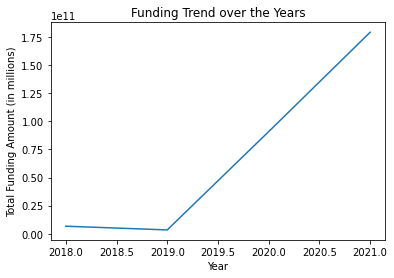

In [166]:
import matplotlib.pyplot as plt
# Calculate the total funding amount for each year
Total_funding = data.groupby("Funding Year")["Amount"].sum()

# Plot the funding trend over the years
plt.plot(Total_funding.index, Total_funding.values)
plt.title("Funding Trend over the Years")
plt.xlabel("Year")
plt.ylabel("Total Funding Amount (in millions)")
plt.show()

The graph shows a decrease in total funding form 2018 until 2019, that was then followed followed by an increase in 2020 and 2021.This may speculate the Maturation of the Indian startup ecosystem. It's possible that the Indian startup ecosystem was still in a nascent stage in 2018 and 2019, and it took some time for it to mature and become more attractive to investors. As the ecosystem matured, more startups were able to secure funding, resulting in the increase in funding in 2020 and 2021.In addition, the increase might have been attributed to the Impact of COVID-19. The pandemic has accelerated digital transformation and disrupted traditional industries, creating new opportunities for startups in areas such as e-commerce, online education, and telemedicine  (Oliver & Lalchev, 2022). Investors may have recognized the potential of these startups and increased their funding to support their growth.

## 2. Which Sectors received the most funding?


In [167]:
# Group the data by company and calculate the total funding amount
company_funding = data.groupby("Sector")["Amount"].sum()

# Sort the companies by funding amount in descending order
company_funding = company_funding.sort_values(ascending=False)

# Print the top 10 companies by funding amount
comp=company_funding.head(10)
comp

Sector
FinTech                               1.538439e+11
Retail                                7.054218e+10
Edtech                                5.415215e+09
Tech company                          3.022700e+09
E-commerce                            2.957967e+09
Multinational conglomerate company    2.200000e+09
Automotive                            2.103010e+09
Financial Services                    1.799826e+09
Hospitality                           1.622903e+09
Logistics                             1.165704e+09
Name: Amount, dtype: float64

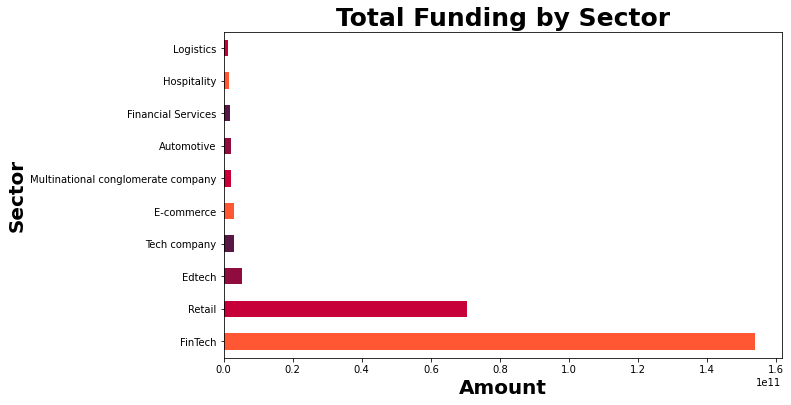

In [168]:
# Create a color list
colors = ['#FF5733', '#C70039', '#900C3F', '#581845']
# Create the stacked bar chart
comp.plot(kind='barh', stacked=True, figsize=(10,6),color=colors)

# Add labels and title
plt.xlabel('Amount',fontsize=20,fontweight='bold')
plt.ylabel('Sector',fontsize=20,fontweight='bold')
plt.title('Total Funding by Sector',fontsize=25,fontweight='bold')

# Display the chart
plt.show()

According to the analysis of the funding trends in the Indian startup ecosystem, the Fintech sector has received the most funding over the years, followed by Retail and EdTech. 

## 3. Who are the top ten investors

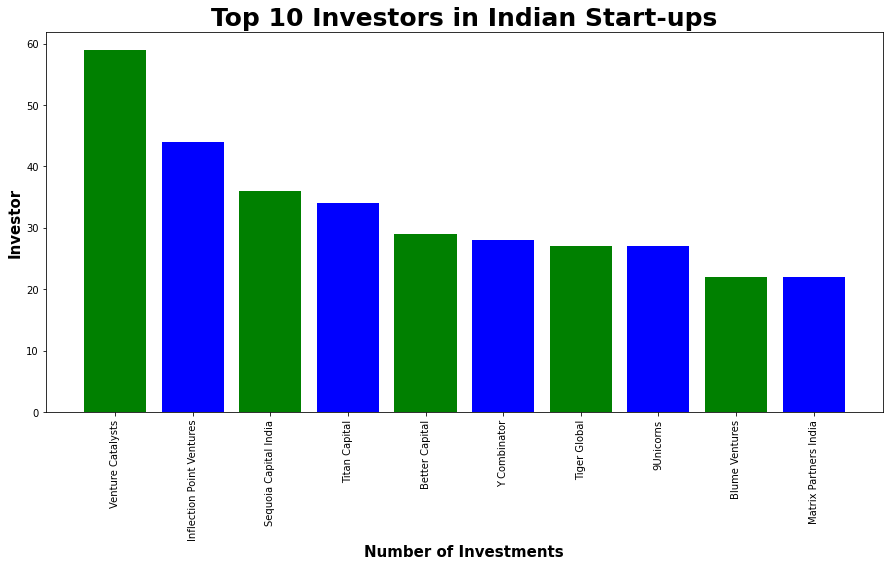

In [169]:


# Create a dictionary to count the number of investments for each investor
investor_count = {}
for i in range(len(data)):
    investors = data['Investor'][i].split(',')
    for investor in investors:
        investor = investor.strip()
        if investor not in ['unknown', 'Undisclosed']:
            if investor in investor_count:
                investor_count[investor] += 1
            else:
                investor_count[investor] = 1

# Sort the dictionary by the number of investments in descending order
investor_count = dict(sorted(investor_count.items(), key=lambda x: x[1], reverse=True))

# Get the top 10 investors
top_investors = list(investor_count.keys())[:10]
top_investor_count = [investor_count[investor] for investor in top_investors]

# Create a bar chart of the top 10 
plt.figure(figsize=(15,7))
plt.bar(top_investors, top_investor_count,color=["green","blue"])
plt.xticks(rotation=90)
plt.title('Top 10 Investors in Indian Start-ups',fontsize=25,fontweight='bold')
plt.xlabel('Number of Investments',fontsize=15,fontweight='bold')
plt.ylabel('Investor',fontsize=15,fontweight='bold')

plt.show()


The analysis identified Venture Catalysts, Inflection point ventures and Sequoia Capital as the top three investors in Indian start-ups. Their investments in various start-ups across different sectors suggest that they have a diverse portfolio and are open to exploring new opportunities.

## 4. What are the top Companies in which start-up in India operate, and how much funding have they received?

In [170]:
# Group the data by sector and calculate the total funding received
sector_funding = data.groupby('Company/Brand')['Amount'].sum().reset_index()

# Sort the data in descending order to determine the top sectors in terms of funding
sector_funding_sorted = sector_funding.sort_values('Amount', ascending=False)

# Print the top 10 sectors and their total funding
print(sector_funding_sorted.head(10))

                     Company/Brand        Amount
70                 Alteria Capital  1.500000e+11
1556  Reliance Retail Ventures Ltd  7.000000e+10
1726                     Snowflake  3.000000e+09
1553                      Reliance  2.200000e+09
1818                        Swiggy  1.956000e+09
2002              VerSe Innovation  1.550000e+09
162                         BYJU'S  1.260000e+09
502                   Dream Sports  1.240000e+09
2153                        Zomato  1.239000e+09
1318                           OYO  9.650000e+08


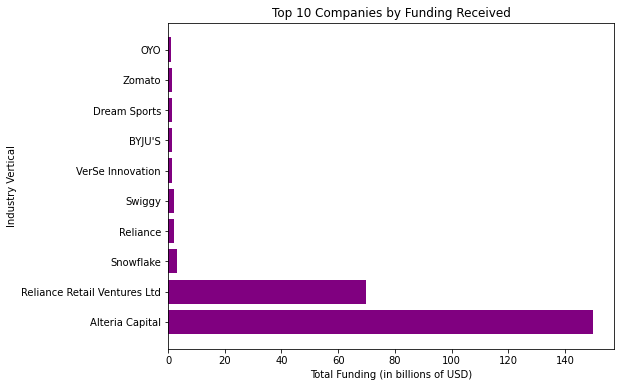

In [171]:
# Group the data by company name and calculate the total funding
sector_funding = data.groupby("Company/Brand")["Amount"].sum().sort_values(ascending=False).head(10)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(sector_funding.index, sector_funding.values/10**9, color="purple")
ax.set_xlabel("Total Funding (in billions of USD)")
ax.set_ylabel("Industry Vertical")
ax.set_title("Top 10 Companies by Funding Received")
plt.show()

The company that has received the most funding is the Alteria Capital, and has received like double the second place, which is Reliance Retail ventures ltd, and the third place being the Snowflake.

## 5. What the entry trend of new companies in the startup ecosystem over the years?

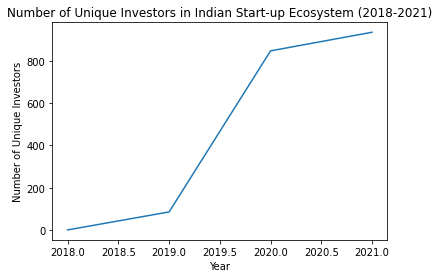

In [172]:
# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['Funding Year'], format='%Y')

# Extract the year from the datetime column
data['year'] = data['date'].dt.year

# Extract the year from the date column
#data['year'] = pd.to_datetime(data['date'].dt.year)

# Get the total number of unique investors each year
investors_count = data.groupby('year')['Investor'].nunique()

# Plot a graph of the number of investors over the years
plt.plot(investors_count.index, investors_count.values)

# Set the title and axis labels
plt.title('Number of Unique Investors in Indian Start-up Ecosystem (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Unique Investors')

# Show the plot
plt.show()


## Hypothesis
H0: Receiving more funds in India, as a start_up depends on the Location

In [173]:
sample1 = data[data['Amount']>0].sort_values('Amount',ascending=True)
sample2 = sample1[sample1['HeadQuarter']!='Unkown Location']
sample3 = sample2[sample2['HeadQuarter']!='nan']

In [174]:
#The location headquarters with the number of startups it host
group_by_location = sample3['HeadQuarter'].value_counts()
group_by_location.head(10)

Bangalore                      634
Mumbai                         307
Gurugram                       232
New Delhi                      121
Chennai                         80
Delhi                           73
Bangalore, Karnataka, India     73
Mumbai, Maharashtra, India      70
Pune                            60
Noida                           53
Name: HeadQuarter, dtype: int64

Bangalore had the most Startups, as their headquarter with 634 startups, followed b Mumbai and Gurugram

In [175]:
Amount_by_Location = sample3.groupby(by='HeadQuarter').Amount.agg(['sum']).sort_values(by=['sum'],ascending=False)
Amount_by_Location[:10]

,sum
HeadQuarter,
Mumbai,2.296686e+11
Bangalore,2.131678e+10
Gurugram,6.342994e+09
California,3.078300e+09
"Bangalore, Karnataka, India",2.304590e+09
New Delhi,2.060695e+09
"Mumbai, Maharashtra, India",1.842373e+09
Delhi,1.656784e+09
Pune,1.355444e+09


Text(0, 0.5, 'Total Funding Received')

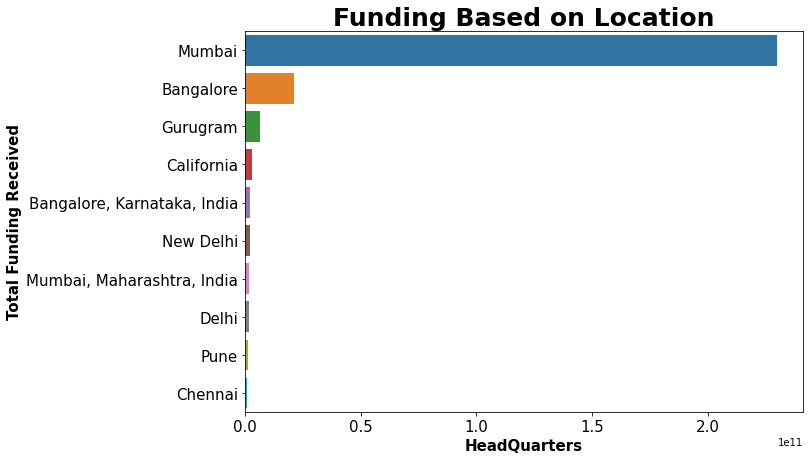

In [176]:
plt.figure(figsize=(10,7))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(y=Amount_by_Location[:10].index,x=(Amount_by_Location['sum'])[:10])
plt.title('Funding Based on Location',fontsize=25,fontweight='bold')
plt.xlabel('HeadQuarters',fontsize=15,fontweight='bold')
plt.ylabel('Total Funding Received',fontsize=15,fontweight='bold')

The plot shows companies headquarters in specific locations, who were most funded.From the analysis, Bangalore had the most startups, as their headquarter, however, in the total amount funded, Mumbai had the highest amount.
## Hypothesis 1:

From the above analysis, we accept the null hypothesis that: Receiving more funds in India, as a start_up depends on the Location. This is because most of the funds were received by start_ups in Mumbai followed by Bangalore.

## Hypothesis 2:
We should accept the null hypothesis, The amount of funding received by start-ups in India has increased over the years, indicating a growing interest in the Indian start-up ecosystem.The funding started to go up in the year 2019. Given the high rate of funding, it is worth notiing that this is the right time to invest, as the funding amount is expected to still go up.
As an AI language model, I don't have direct access to post content on external platforms like LinkedIn. However, I can provide you with the text for your LinkedIn post based on the project. You can copy and paste the text into your LinkedIn profile or share it as a post. Here's the suggested LinkedIn post:


## Conclusion and Recommendation

1. Funding Growth: The amount of funding received by Indian start-ups has been on a steady rise, indicating a growing interest in the ecosystem. This presents a great opportunity for entrepreneurs and investors looking to tap into the Indian market.

2.  Promising Sectors: E-commerce, retail,Tech companies, fintech, and edtech emerged as the top sectors in terms of funding. These sectors have shown tremendous potential for growth and innovation, making them attractive investment areas.

3. Top Investors: Venture Catalysts,Inflection point ventures,Sequoia Capital,Titan Capital, an Better Capital were identified as the top investors in the Indian start-up ecosystem. Start-ups that have received funding from these investors tend to have higher chances of success.

#### Recommendation:

Based on the analysis, I recommend exploring opportunities in the high-growth sectors of e-commerce,tech,fintech, and edtech. Collaborating with top investors can also enhance the likelihood of success for our venture.


###                                                                     References
Difference between Delhi and New Delhi | Delhi vs New Delhi. (2017, July 26). Difference Between | Descriptive Analysis and Comparisons. https://www.differencebetween.info/difference-between-delhi-and-new-delhi

Oliver, P. G., & Lalchev, S. (2022). Digital transformation in the music industry: How the COVID-19 pandemic has accelerated new business opportunities. Music Business Research, 55-72. https://doi.org/10.1007/978-3-031-09532-0_4

Rupee to dollar exchange rate today, live 1 INR to USD = 0.0122 (Convert rupees to dollars). (n.d.). Exchange Rates UK - Compare Live Foreign Currency Exchange Rates. https://www.exchangerates.org.uk/Rupees-to-Dollars-currency-conversion-page.html